# Gabriel Erin Liakof- 2018402177 
# IE 360 - HW1


### In this paper, I will examine possible factors that affect people's tendency to buy or build a house in Turkey. To examine, I will use these data:
    Interest rates for house loans
    Average real rental earning from houses
    Average house prices
    Dollar exchange rate($/TL)
    
### The monthly data between 2012-Jan and 2022 Jan will be examined, which is taken from EVDS.

### In addition to EVDS data, google trend data for "satılık ev" will be examined to see if there is a correlation between google searches and people's tendency to buy houses.
    
    

# 1) Gathering and Arranging the Data

In [16]:
library(readxl)
library("ggplot2")
library("usethis")
library("zoo")
library('ggcorrplot')
library('GGally')
library("gtrendsR")

In [2]:
Trend=read_excel("C:\\Users\\gabri\\Desktop\\GoogleTrend_hw1.xlsx")
Data<-read_excel("C:\\Users\\gabri\\Desktop\\Data_Hw1.xlsx")
Data$Tarih = paste0(Data$Tarih, rep("-01",length(Data$Tarih))) 
Data$Tarih = as.Date(Data$Tarih)
Data=data.frame(cbind(Data,Trend$Searches))
Data[,1]=as.Date(Data[,1])
colnames(Data)=c("Dates","Probability", "InterestRate", "RentEarning", "HousePrices", "ExchangeRate","Searches")


# 2) Visualization of the Data

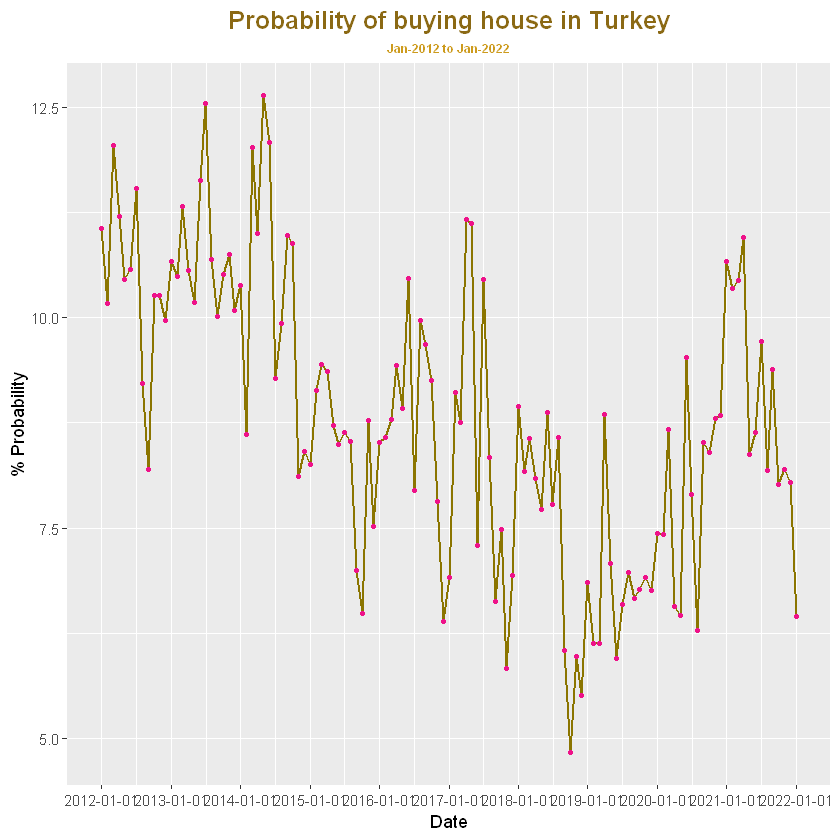

In [3]:
#Probability
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=Probability),size=0.7,colour="gold4")+
  geom_point(mapping=aes(x=Dates,y=Probability),colour="deeppink2",size=1)+
  labs(title = "Probability of buying house in Turkey", x = "Date",y = "% Probability",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

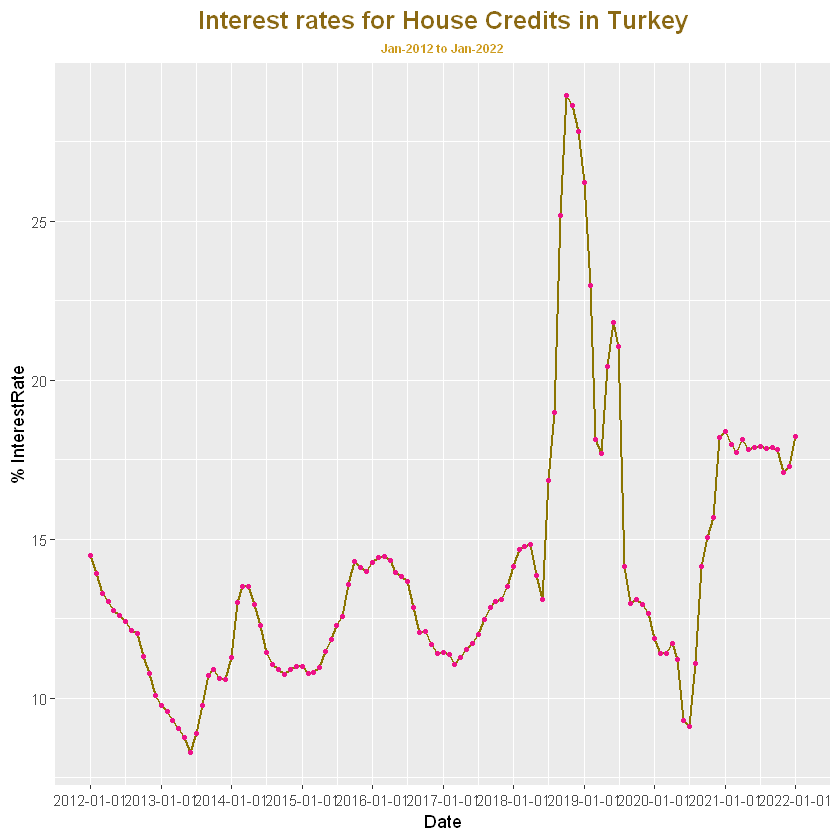

In [4]:
#InterestRate
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=InterestRate),size=0.7,colour="gold4")+
  geom_point(mapping=aes(x=Dates,y=InterestRate),colour="deeppink2",size=1)+
  labs(title = "Interest rates for House Credits in Turkey", x = "Date",y = "% InterestRate",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")



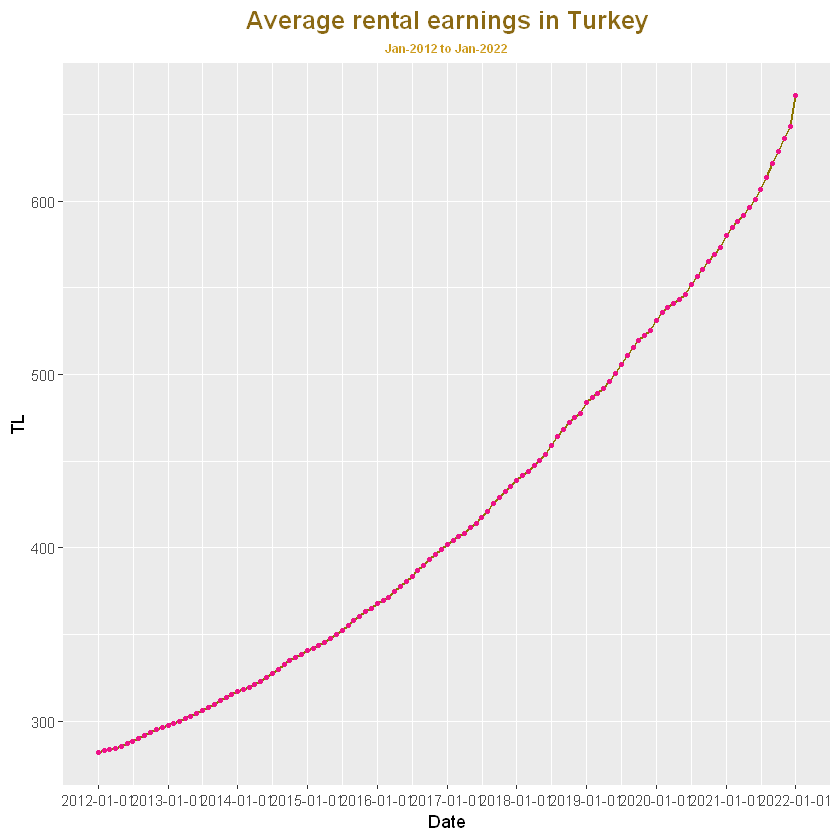

In [5]:
#RentEarning
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=RentEarning),size=0.7,colour="gold4")+
  geom_point(mapping=aes(x=Dates,y=RentEarning),colour="deeppink2",size=1)+
  labs(title = "Average rental earnings in Turkey", x = "Date",y = "TL",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")


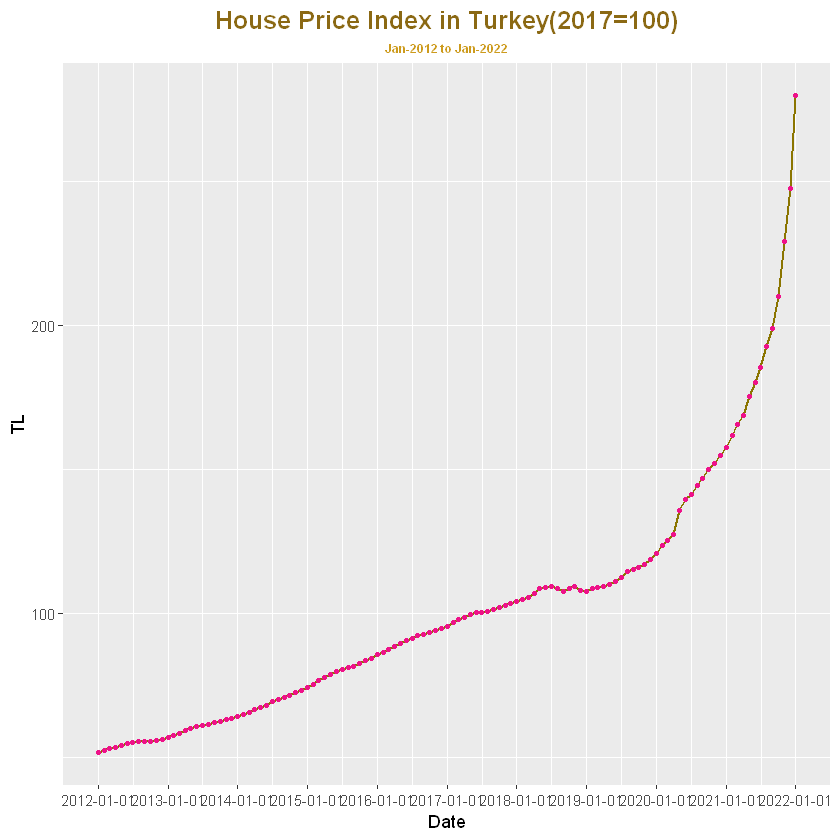

In [6]:
#HousePrices
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=HousePrices),size=0.7,colour="gold4")+
  geom_point(mapping=aes(x=Dates,y=HousePrices),colour="deeppink2",size=1)+
  labs(title = "House Price Index in Turkey(2017=100)", x = "Date",y = "TL",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

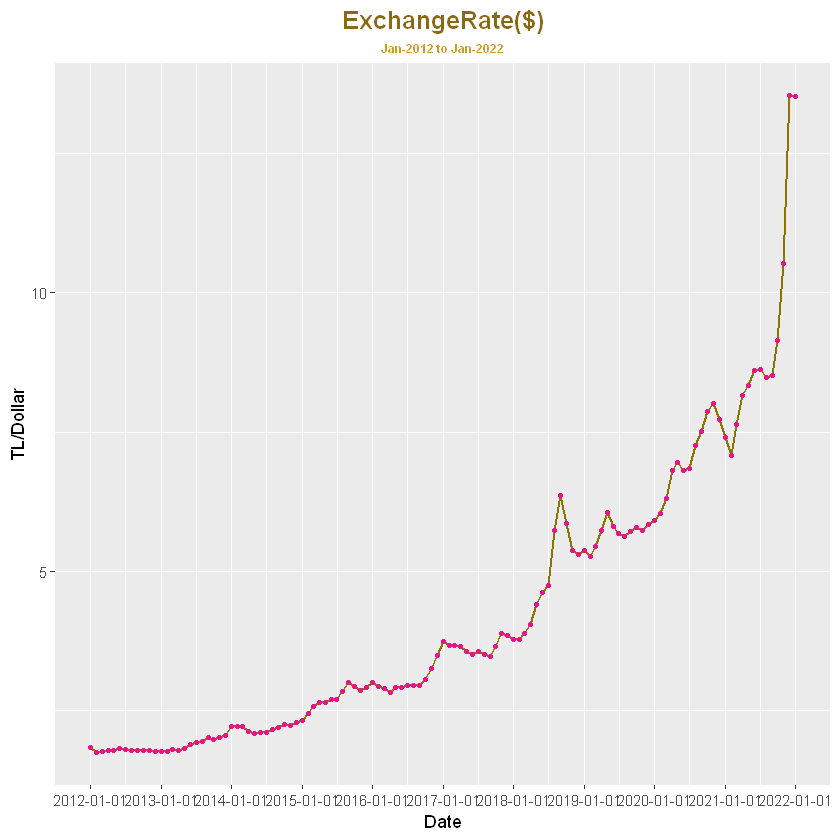

In [7]:
#ExchangeRate
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=ExchangeRate),size=0.7,colour="gold4")+
  geom_point(mapping=aes(x=Dates,y=ExchangeRate),colour="deeppink2",size=1)+
  labs(title = "ExchangeRate($)", x = "Date",y = "TL/Dollar",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")


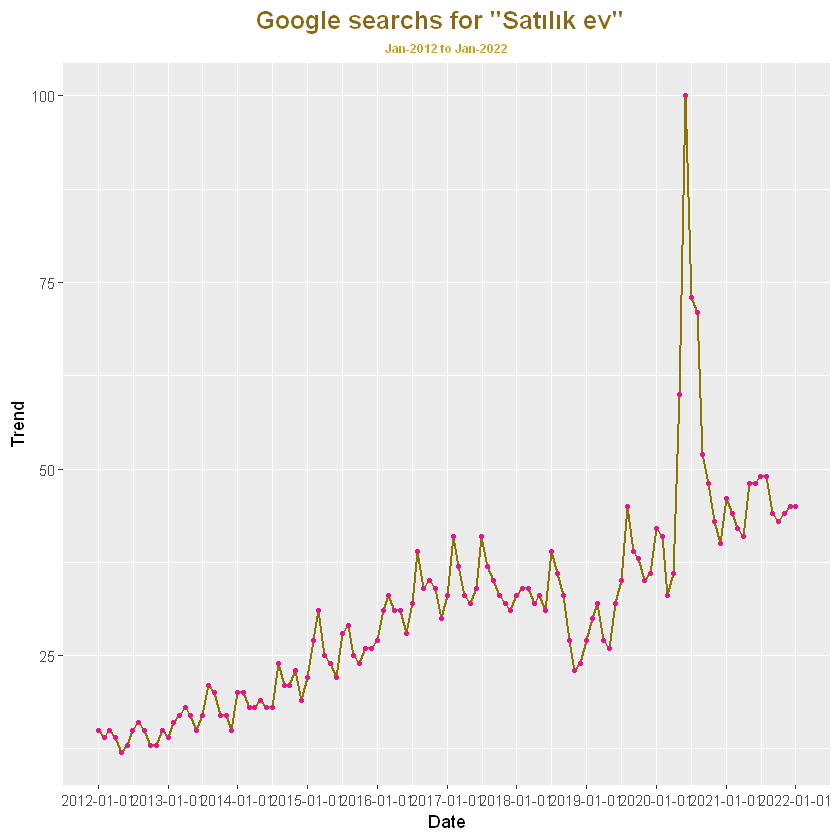

In [8]:
#Trend
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=Searches),size=0.7,colour="gold4")+
  geom_point(mapping=aes(x=Dates,y=Searches),colour="deeppink2",size=1)+
  labs(title = "Google searchs for \"Satılık ev\"  ", x = "Date",y = "Trend",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

# 3)  Visual Comparison of "Probability" Data and the Other Data

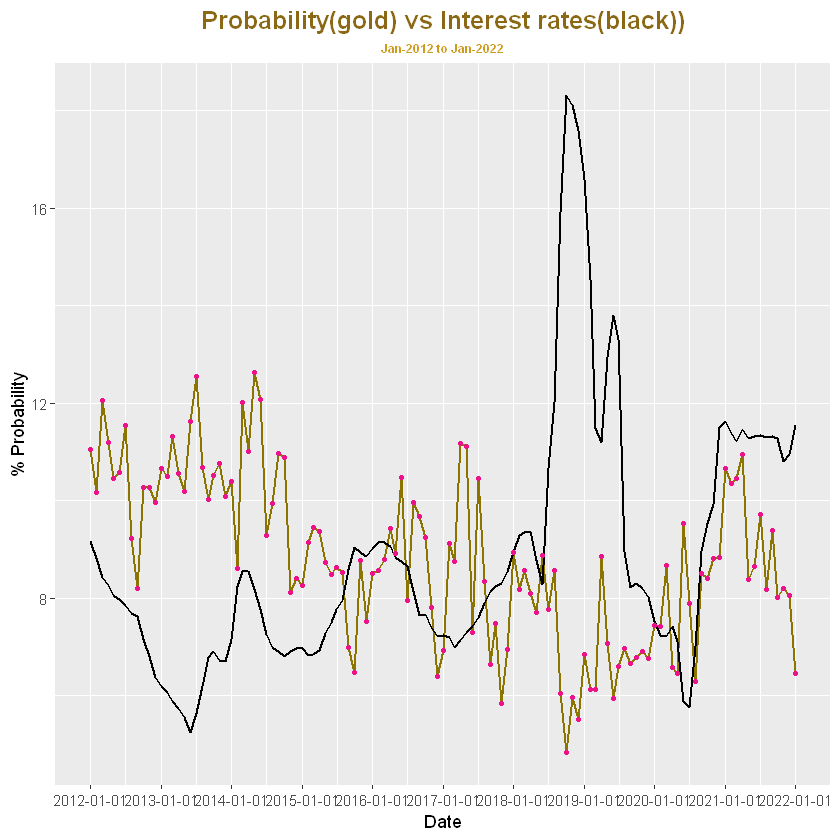

In [9]:
scaler= mean(Data$Probability)/mean(Data$InterestRate)
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=Probability),size=0.7,colour="gold4")+
  geom_line(mapping=aes(x=Dates,y=InterestRate*scaler),size=0.7,colour="black")+
  geom_point(mapping=aes(x=Dates,y=Probability),colour="deeppink2",size=1)+
  labs(title = "Probability(gold) vs Interest rates(black))", x = "Date",y = "% Probability",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

When the graph is visually examined, it looks like there is a negative correlation between probability to buy a house and house loan interest.

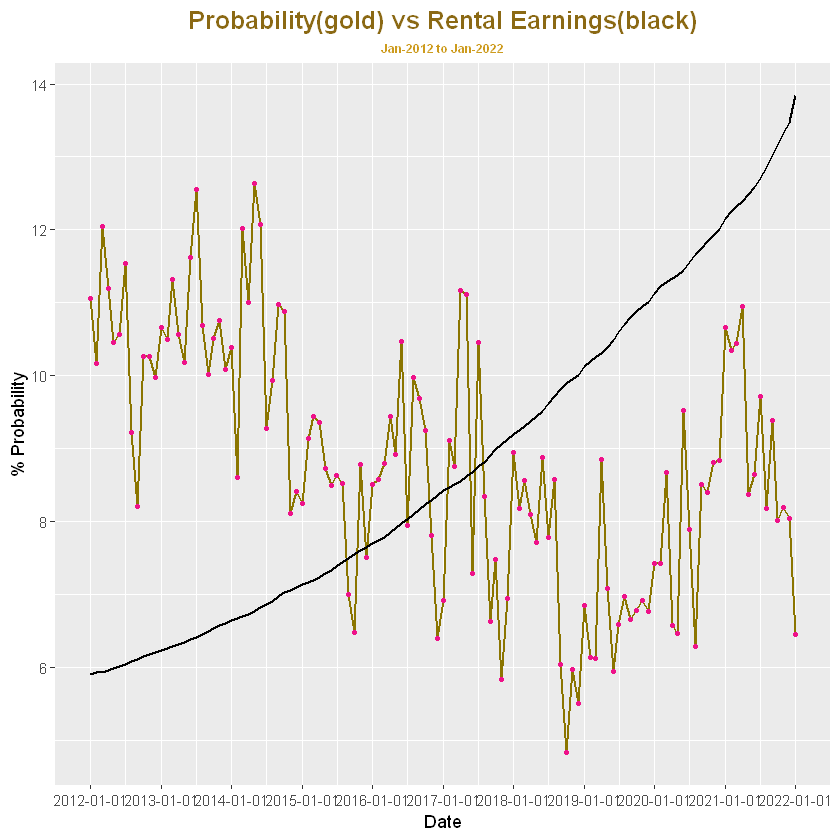

In [10]:
scaler= mean(Data$Probability)/mean(Data$RentEarning)
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=Probability),size=0.7,colour="gold4")+
  geom_line(mapping=aes(x=Dates,y=RentEarning*scaler),size=0.7,colour="black")+
  geom_point(mapping=aes(x=Dates,y=Probability),colour="deeppink2",size=1)+
  labs(title = "Probability(gold) vs Rental Earnings(black)", x = "Date",y = "% Probability",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

## There is no clear pattern between probability and real rental earnings from houses.

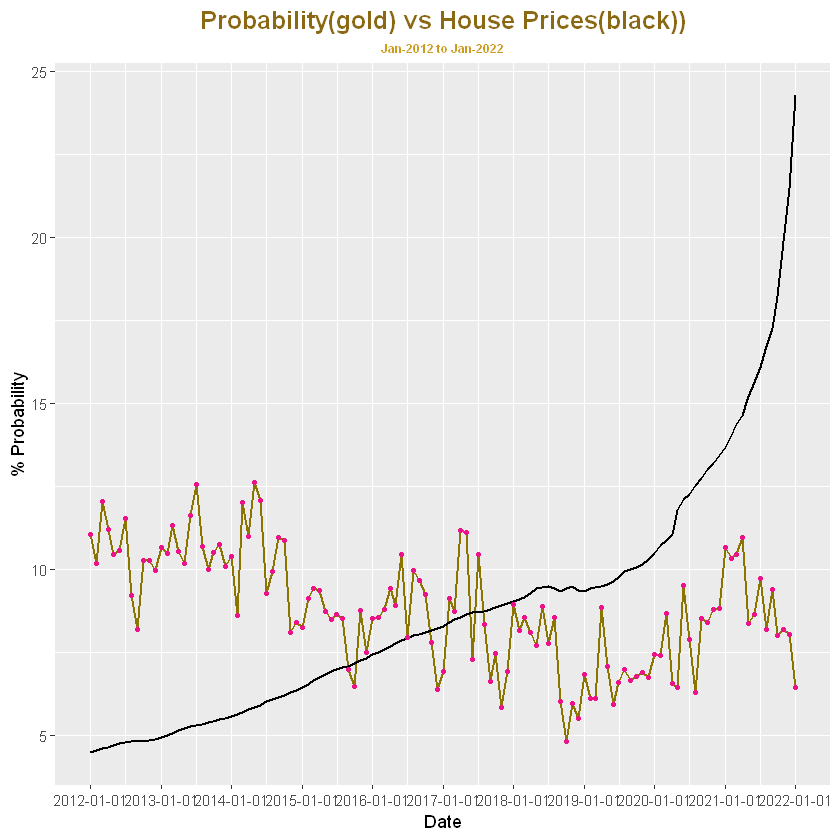

In [11]:
scaler= mean(Data$Probability)/mean(Data$HousePrices)
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=Probability),size=0.7,colour="gold4")+
  geom_line(mapping=aes(x=Dates,y=(HousePrices*scaler)),size=0.7,colour="black")+
  geom_point(mapping=aes(x=Dates,y=Probability),colour="deeppink2",size=1)+
  labs(title = "Probability(gold) vs House Prices(black))", x = "Date",y = "% Probability",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

## There is no clear visual pattern between house prices and probability.

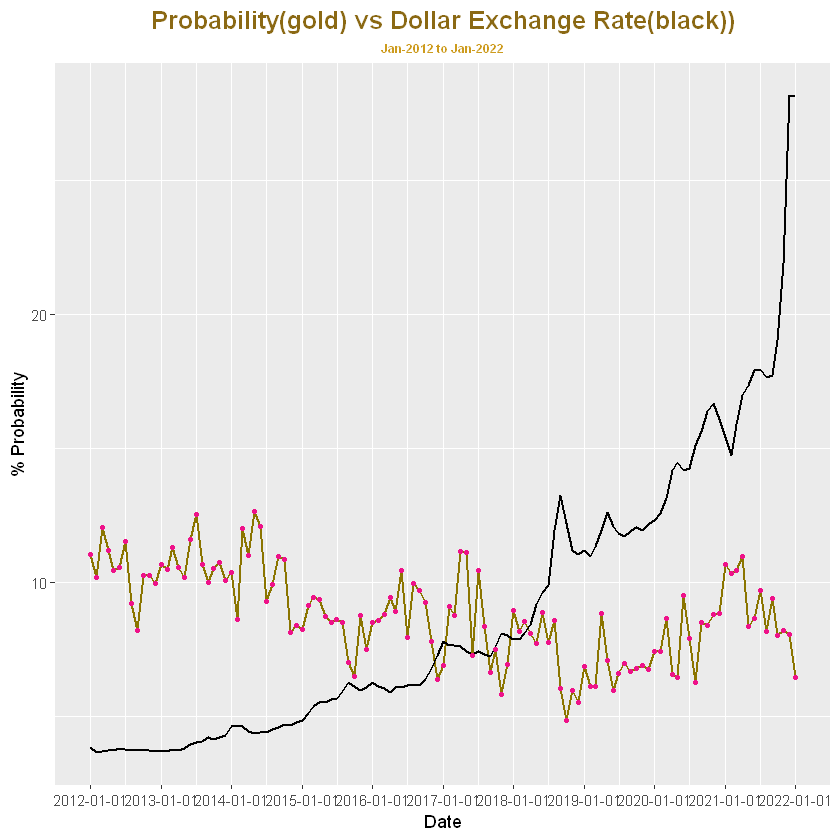

In [12]:
scaler= mean(Data$Probability)/mean(Data$ExchangeRate)
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=Probability),size=0.7,colour="gold4")+
  geom_line(mapping=aes(x=Dates,y=ExchangeRate*scaler),size=0.7,colour="black")+
  geom_point(mapping=aes(x=Dates,y=Probability),colour="deeppink2",size=1)+
  labs(title = "Probability(gold) vs Dollar Exchange Rate(black))", x = "Date",y = "% Probability",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

## It looks like there is a negative correlation between probability and exchange.

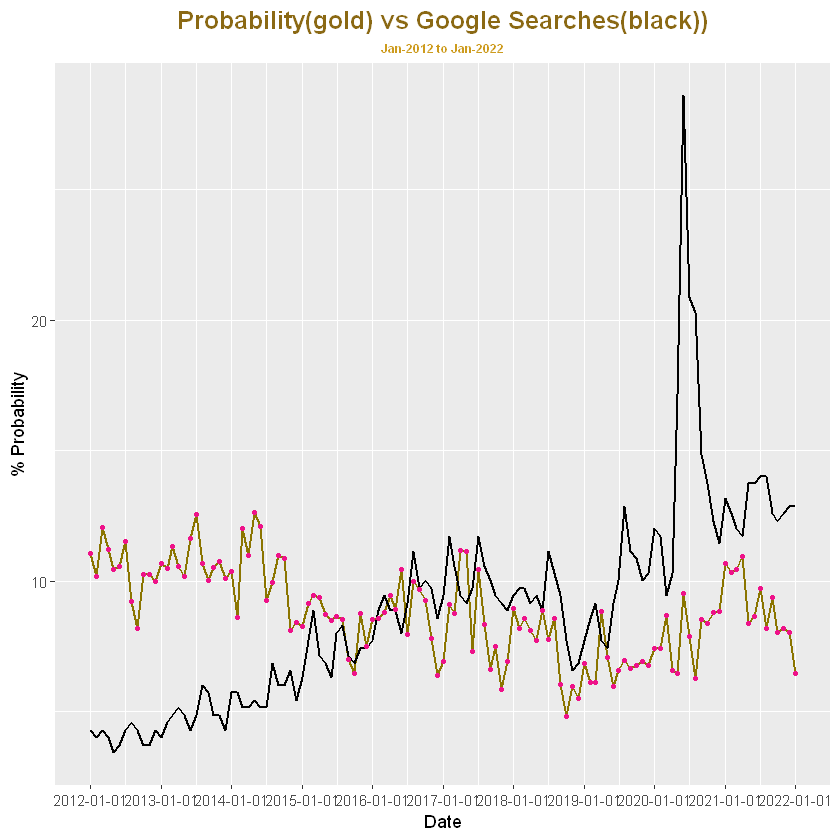

In [13]:
scaler= mean(Data$Probability)/mean(Data$Searches)
ggplot(data=Data)+geom_line(mapping=aes(x=Dates,y=Probability),size=0.7,colour="gold4")+
  geom_line(mapping=aes(x=Dates,y=Searches*scaler),size=0.7,colour="black")+
  geom_point(mapping=aes(x=Dates,y=Probability),colour="deeppink2",size=1)+
  labs(title = "Probability(gold) vs Google Searches(black))", x = "Date",y = "% Probability",subtitle = "Jan-2012 to Jan-2022")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "1 year")

### It looks like there is a positive correlation between "satılık ev" searches and probability of buying house.

# 4) Comment on ggpair table

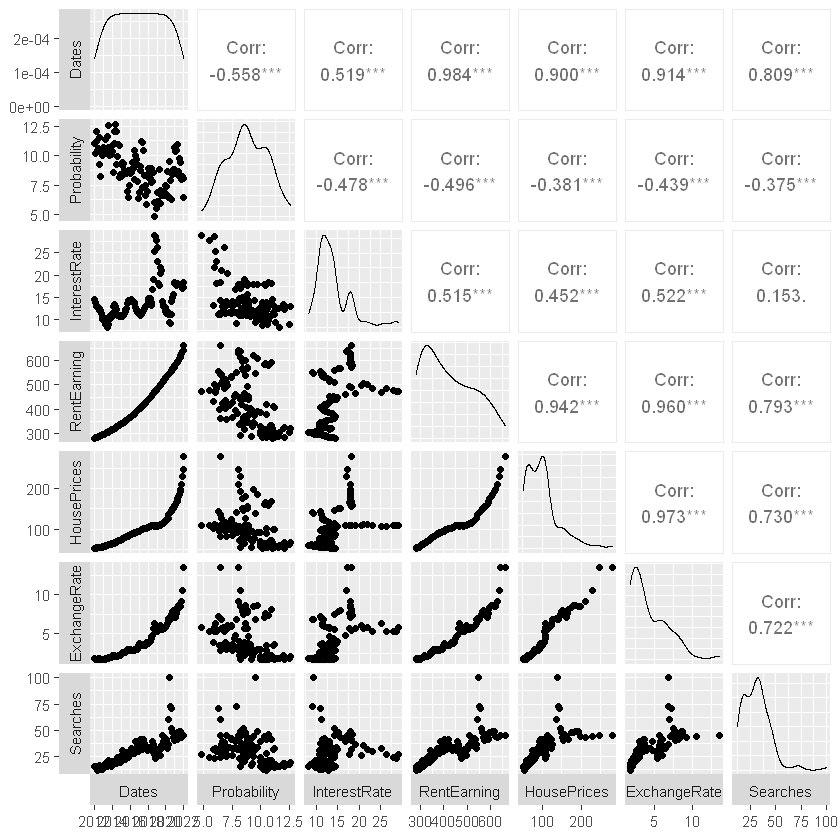

In [14]:
ggpairs(Data,switch='both')

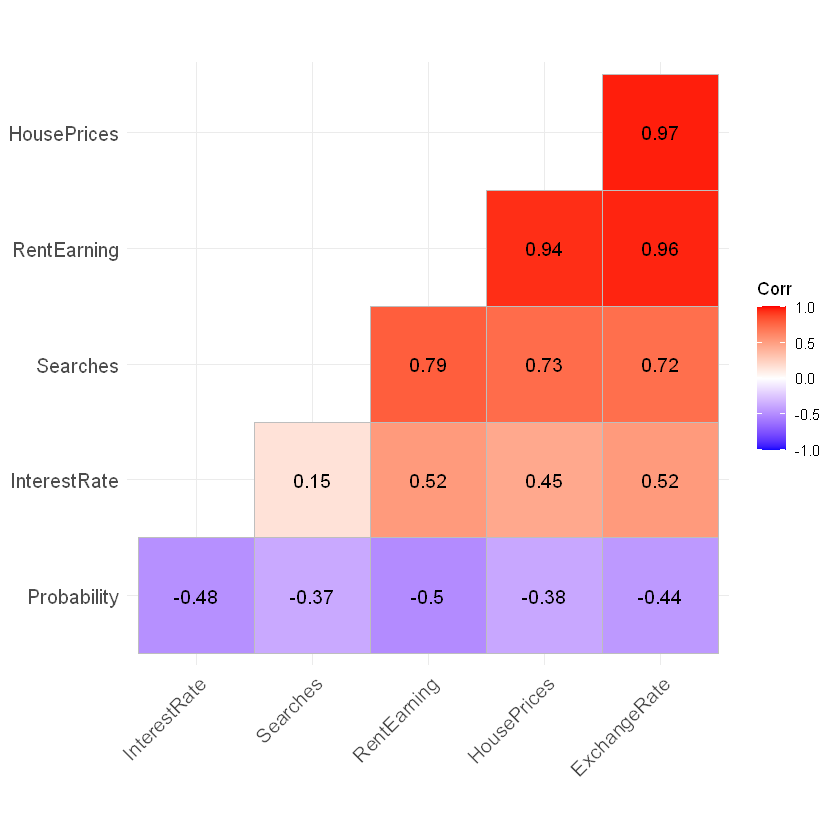

In [15]:
cor_data=data.frame(cbind(Data$Probability,Data$InterestRate,Data$RentEarning,Data$HousePrices,Data$ExchangeRate,Data$Searches)) 
colnames(cor_data)=c("Probability", "InterestRate", "RentEarning", "HousePrices", "ExchangeRate","Searches") 

ggcorrplot(cor(cor_data), 
           hc.order = TRUE, 
           type = "lower",
           lab = TRUE)

### When the ggpair and correlation table is examined, it seems that the probability of buying a house has a negative correlation with all other categories. To have a better understanding, I will comment from scatter plots together with the correlation coefficient: 
#### Probability vs Interest rate: The correlation coefficient is -0.48, implying a severe negative correlation between probability and interest rate for house loans. This correlation is logical because as interest rates are higher, borrowing money becomes more expensive, so people think that they won't afford to take credit, so they don't think about buying a house. Scatterplots show this effect successfully for high-interest rates. For the high-interest rates, the probability becomes low. However, under %12 interest rate, probability doesn't strictly depend on the loan interest rate.

#### Probability vs rental earnings: When the scatter plot is examined, it looks like rental earnings and probability are negatively correlated. Intuitively, I would expect people to want to buy a house when rental earnings are higher. However, ggpairs show that rental earnings are strictly correlated with house prices and dollar exchange rate. So I conclude that increasing cost of buying house affects people's minds more than the increase in monthly revenue from houses.

#### Probability vs House prices: From the scatter plot, it can be seen that as the house prices increase, people's willingness to buy a house decreases.

#### Probability vs Exchange rate: From scatter plot, it can be seen that people's willingness to buy houses decreases as the exchange rate increases. This is probably because of the high correlation between house prices and exchange rates. So, as the exchange rate rises, house prices rise too and so, people don't want to buy a house.

#### Probability vs. Trend: GGpairs function indicates that probability has a negative correlation between google searches. However, probability - trend scatter plot looks random. This negative correlation stems from some outlier points in 2020, so if they weren't there, I think the probability of buying a house isn't dependent to google searches for 'satılık ev'

# 5) Conclusion
### I tried to examine probability of buying house with respect to interest rate for house loans, real rental earnings, house prices and exchange rate. I found that, in general, probability is dependent to these variables. However, there is no variable that affects the probability directly.  Besides, my dependent variables have high correlation in themselves, so their correlation with probability was similar.
### In addition, I compared the probability with google trends for "satılık ev". It seems like probability has no similarity with google searches for "satılık ev"